$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Práctica 1 | Grid Search y Cross Validation}$$

_Profesor: Moisés Meza, Jesus Alvarado_

_Alumno: Luis Revilla_

# 0. Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Información del dataset:

La base de datos contiene registros de 1885 encuestados. Se conocen 12 atributos de cada encuestado: Medidas de personalidad que incluyen NEO-FFI-R (neuroticismo, extraversión, apertura a la experiencia, agradabilidad y concienciación), BIS-11 (impulsividad) e ImpSS (búsqueda de sensaciones), nivel de estudios, edad, sexo, país de residencia y origen étnico. Todos los atributos de entrada son originalmente categóricos y se cuantifican. Tras la cuantificación, los valores de todas las características de entrada pueden considerarse reales. Además, se preguntó a los participantes sobre su consumo de 18 drogas legales e ilegales (alcohol, anfetaminas, nitrito de amilo, benzodiacepinas, cannabis, chocolate, cocaína, cafeína, crack, éxtasis, heroína, ketamina, drogas legales, LSD, metadona, setas, nicotina y abuso de sustancias volátiles) y de una droga ficticia (Semeron) que se introdujo para identificar a los consumidores excesivos. Para cada droga tienen que seleccionar una de las respuestas: nunca consumió la droga, la consumió hace más de una década o en la última década, año, mes, semana o día.
La base de datos contiene 18 problemas de clasificación. Cada una de las variables de etiqueta independientes contiene siete clases: "Nunca consumió", "Consumió hace más de una década", "Consumió en la última década", "Consumió en el último año", "Consumió en el último mes", "Consumió en la última semana" y "Consumió en el último día".

# Data acquisition

In [2]:
!gdown https://drive.google.com/uc?id=1ow7fzC2_XfInz7XUjHkWdLUWHKNFuPHR

Downloading...
From: https://drive.google.com/uc?id=1ow7fzC2_XfInz7XUjHkWdLUWHKNFuPHR
To: /content/drug_consumption.data
100% 347k/347k [00:00<00:00, 55.6MB/s]


In [3]:
data = pd.read_csv("drug_consumption.data", names=['id', 'age', 'gender', 'education', 'country', 'ethnicity', 'neuroticism', 'extraversion', 'openness', 'agreeableness', 'conscientiousness', 'impulsiveness', 'sensation', 'alcohol', 'amfet', 'amyl', 'benzos', 'caf', 'cannabis', 'choc', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa'])
data

,id,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,...,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [4]:
data.columns

Index(['id', 'age', 'gender', 'education', 'country', 'ethnicity',
       'neuroticism', 'extraversion', 'openness', 'agreeableness',
       'conscientiousness', 'impulsiveness', 'sensation', 'alcohol', 'amfet',
       'amyl', 'benzos', 'caf', 'cannabis', 'choc', 'coke', 'crack', 'ecstasy',
       'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine',
       'semer', 'vsa'],
      dtype='object')

#Preprocesamiento

Hacemos todas las variables categorías de acuerdo a lo especificado por UCI Machine Learning

In [5]:
categorical_columns = ['age', 'gender', 'education', 'country', 'ethnicity',                       
                       'neuroticism', 'extraversion', 'openness', 'agreeableness',                       
                       'conscientiousness', 'impulsiveness', 'sensation', 'alcohol', 'amfet',                       
                       'amyl', 'benzos', 'caf', 'cannabis', 'choc', 'coke', 'crack', 'ecstasy',                       
                       'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine',                       
                       'semer', 'vsa']

data[categorical_columns] = data[categorical_columns].astype('category')

In [6]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 1.0 MB/s eta 0:00:00


In [7]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder 

Los valores de cada categoría son términos que no están escalados, por lo que los normalizamos con Label Encoder

In [8]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['age', 'gender', 'education', 'country', 'ethnicity',                                              'neuroticism', 'extraversion', 'openness', 'agreeableness',                                              'conscientiousness', 'impulsiveness', 'sensation', 'alcohol', 'amfet',                                              'amyl', 'benzos', 'caf', 'cannabis', 'choc', 'coke', 'crack', 'ecstasy',                                              'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine',                                              'semer', 'vsa']

data[categorical_columns] = data[categorical_columns].astype('category')

for col in categorical_columns:
    encoder = LabelEncoder()
    encoded_col = encoder.fit_transform(data[col])
    data[col] = encoded_col

In [9]:
data

,id,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,...,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,1,2,1,5,6,5,27,19,16,17,...,0,0,0,0,0,0,0,2,0,0
1,2,1,0,8,6,2,17,35,29,28,...,4,0,2,0,2,3,0,4,0,0
2,3,2,0,5,6,2,19,28,14,12,...,0,0,0,0,0,0,1,0,0,0
3,4,0,1,7,6,2,22,17,20,27,...,0,0,2,0,0,0,0,2,0,0
4,5,2,1,8,6,2,31,11,17,21,...,1,0,0,1,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,0,1,4,0,2,13,34,31,28,...,0,0,0,3,3,0,0,0,0,5
1881,1885,0,0,4,0,2,21,34,24,28,...,2,0,0,3,5,4,4,5,0,0
1882,1886,1,1,6,0,2,35,13,11,11,...,4,0,2,0,2,0,2,6,0,0
1883,1887,0,1,4,0,2,33,9,22,12,...,3,0,0,3,3,0,3,4,0,0


Seleccionamos como variable objetivo predecir de qué país es el paciente de acuerdo a sus antecedentes en drogas y/o de acuerdo a resultados de evaluaciones como la NEO-FFI-R

In [10]:
y = data.country
X = data.drop(["country","id"], axis=1) 

In [11]:
X

,age,gender,education,ethnicity,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,...,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,2,1,5,5,27,19,16,17,24,3,...,0,0,0,0,0,0,0,2,0,0
1,1,0,8,2,17,35,29,28,23,2,...,4,0,2,0,2,3,0,4,0,0
2,2,0,5,2,19,28,14,12,16,1,...,0,0,0,0,0,0,1,0,0,0
3,0,1,7,2,22,17,20,27,28,1,...,0,0,2,0,0,0,0,2,0,0
4,2,1,8,2,31,11,17,21,32,3,...,1,0,0,1,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,0,1,4,2,13,34,31,28,15,6,...,0,0,0,3,3,0,0,0,0,5
1881,0,0,4,2,21,34,24,28,12,6,...,2,0,0,3,5,4,4,5,0,0
1882,1,1,6,2,35,13,11,11,13,5,...,4,0,2,0,2,0,2,6,0,0
1883,0,1,4,2,33,9,22,12,4,7,...,3,0,0,3,3,0,3,4,0,0


In [12]:
y

0       6
1       6
2       6
3       6
4       6
       ..
1880    0
1881    0
1882    0
1883    0
1884    4
Name: country, Length: 1885, dtype: int64

In [13]:
# Verificamos valores faltantes en y
y.isnull().sum()

0

In [14]:
# Verificamos valores faltantes en X
X.isnull().sum()

age                  0
gender               0
education            0
ethnicity            0
neuroticism          0
extraversion         0
openness             0
agreeableness        0
conscientiousness    0
impulsiveness        0
sensation            0
alcohol              0
amfet                0
amyl                 0
benzos               0
caf                  0
cannabis             0
choc                 0
coke                 0
crack                0
ecstasy              0
heroin               0
ketamine             0
legalh               0
lsd                  0
meth                 0
mushrooms            0
nicotine             0
semer                0
vsa                  0
dtype: int64

In [15]:
# Variables cuantitativas en X
X.dtypes

age                  int64
gender               int64
education            int64
ethnicity            int64
neuroticism          int64
extraversion         int64
openness             int64
agreeableness        int64
conscientiousness    int64
impulsiveness        int64
sensation            int64
alcohol              int64
amfet                int64
amyl                 int64
benzos               int64
caf                  int64
cannabis             int64
choc                 int64
coke                 int64
crack                int64
ecstasy              int64
heroin               int64
ketamine             int64
legalh               int64
lsd                  int64
meth                 int64
mushrooms            int64
nicotine             int64
semer                int64
vsa                  int64
dtype: object

In [16]:
y.dtype

dtype('int64')

# Exploratory Data Analysis

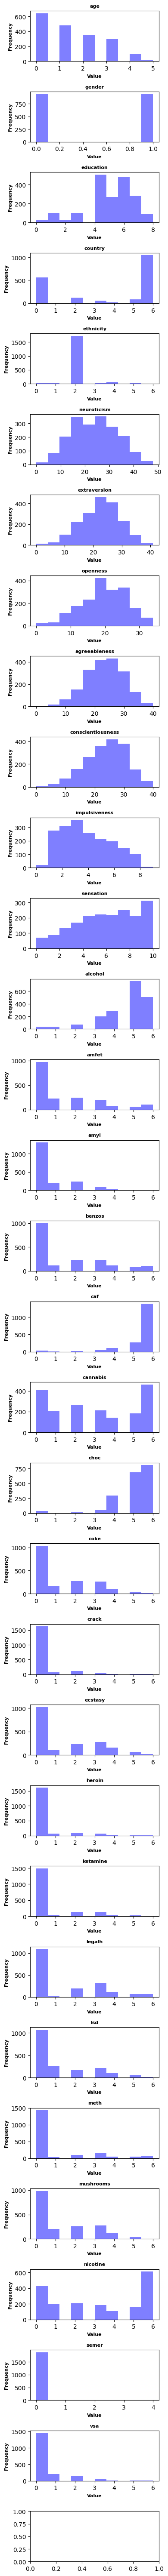

In [17]:
# Histograma para cada variable en la lista respecto a la variable objetivo

fig, axs = plt.subplots(nrows=len(data.columns), figsize=(4, 60))
for i, col in enumerate(data.drop('id', axis=1).columns):
    axs[i].hist(data[col], alpha=0.5, bins=10, color='blue')
    axs[i].set_title(col, fontsize=8, weight='bold')
    axs[i].set_xlabel('Value', fontsize=8, weight='bold')
    axs[i].set_ylabel('Frequency', fontsize=8, weight='bold')
plt.tight_layout()
plt.show()


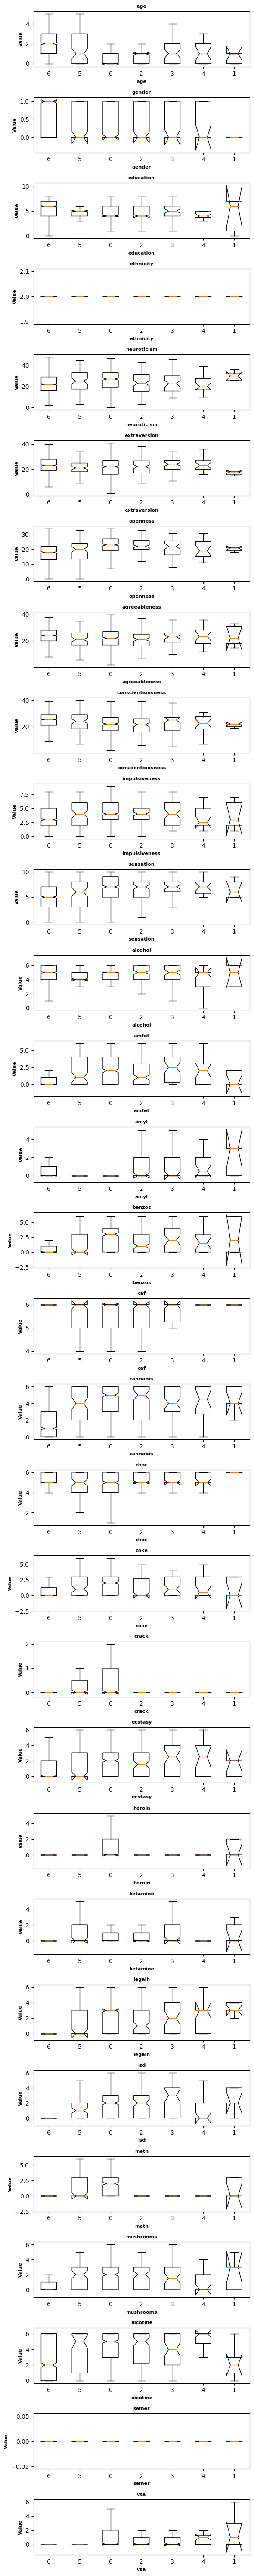

In [18]:
#Grafico de caja y bigotes para apreciar la distribucion de variables de acuerdo
#a los países

fig, axs = plt.subplots(nrows=len(data.columns)-2, figsize=(6, 60))
for i, col in enumerate(data.drop(['id', 'country'], axis=1).columns):
    axs[i].boxplot([data[data['country'] == c][col] for c in data['country'].unique()],
                   labels=data['country'].unique(),
                   showfliers=False,
                   notch=True)
    axs[i].set_title(col, fontsize=8, weight='bold')
    axs[i].set_xlabel(col, fontsize=8, weight='bold')
    axs[i].set_ylabel('Value', fontsize=8, weight='bold')
plt.tight_layout()
plt.show()


In [19]:
# Construyendo el modelo de regresión logística

# 1er paso: Particionamos (usando muestreo estratificado siguiendo la 
#distribución de la variable dependiente)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                test_size=0.10)

<Axes: xlabel='alcohol', ylabel='count'>

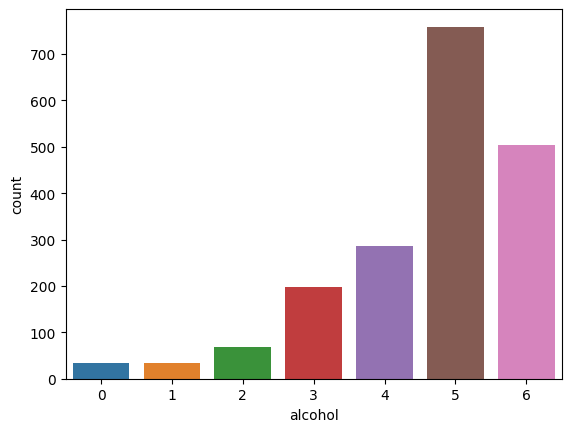

In [20]:
sns.countplot(x="alcohol", data = data)

<Axes: xlabel='cannabis', ylabel='count'>

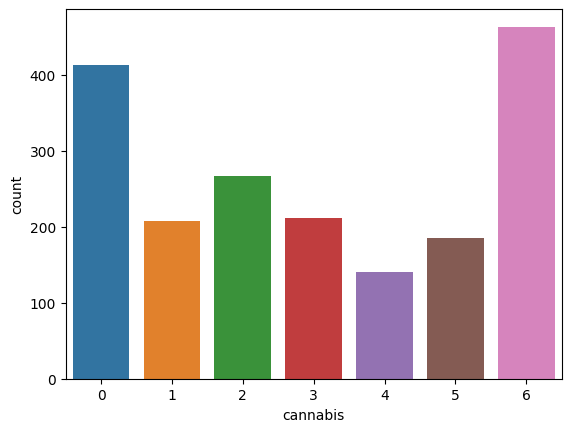

In [21]:
sns.countplot(x="cannabis", data = data)

# Entrenamiento del modelo

In [22]:
# Importar librerías
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separar datos en variables predictoras y variable objetivo
X = data.drop(['country'], axis=1)
y = data['country']

# Crear conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciar y entrenar el modelo
ModelDrugs = RandomForestClassifier()
ModelDrugs.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = ModelDrugs.predict(X_test)

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy}")


Exactitud del modelo: 0.773851590106007


In [23]:
# Hay problemas de convergencia?

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                test_size=0.15)
ModelCancer1 = RandomForestClassifier()
ModelCancer1.fit(Xtrain,ytrain)
ModelCancer1.score(Xtest, ytest)

0.7561837455830389

0.8056537102473498

0.7561837455830389

0.7420494699646644


type - dir - help

In [24]:
help(RandomForestClassifier())
#max_iter : int, default=100

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

# Cálculo de Pronósticos: Predict

In [25]:
# Se usaron 483 instancias para entrenamiento y 86 para test
# Deseo una pequeña muestra de 20 datos (idealmente independientes pero
# los voy a seleccionar del conjunto de test)
# Construyendo el conjunto de índices

IndexSet = np.random.choice(np.array(range(0,86)), 20)
IndexSet

array([58, 15, 25, 48, 46, 81,  7, 60, 69, 64, 26,  2, 51, 78, 34,  5, 71,
       65, 39, 38])

In [26]:
# Muestreamos los datos de testeo
VarIndeps = Xtest.iloc[IndexSet]
VarDepen = ytest.iloc[IndexSet]

In [27]:
# Construimos pronósticos con esta pequeña muestra
YModel = ModelDrugs.predict(VarIndeps)
YModel

array([0, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 0, 2, 6, 6, 0, 4, 6, 6, 6])

In [28]:
from sklearn.metrics import accuracy_score

# Calculamos la precisión
accuracy = accuracy_score(VarDepen, YModel)

print("La precisión es:", accuracy)


La precisión es: 0.9


# Optimización de hiperparámetros

In [29]:
# Optimización de hiperparámetros
# Tiene como objetivo hacer que el modelo sea lo más robusto, lo más estable 
# posible para generalizar el conocimiento en los datos de entrenamiento.

help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [30]:
# Cargar la clase GridSearchCV
from sklearn.model_selection import GridSearchCV
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

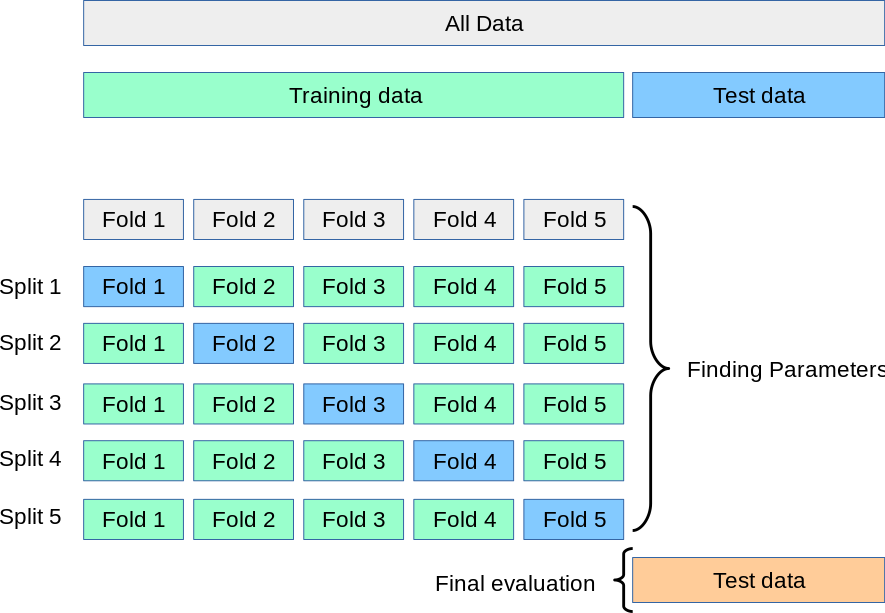

In [31]:
# Creación del estimador: Modelo
ModReg_Drugs = RandomForestClassifier()

# Hiperparametros y Cross Validation

In [32]:
# Diccionario de hiperparámetros: Definir el espacio de búsqueda de hiperparámetros
DictHP_Neuroticism = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [33]:
# Configuramos la búsquedad de hiperparámetros: 
# Instanciamos la clase GridSearchCV
ModReg_Drugs_GS1 = GridSearchCV(ModReg_Drugs,
                                    param_grid=DictHP_Neuroticism,
                                    cv=5,
                                    verbose=4,
                                    n_jobs=2)

In [34]:
import time 
IniciamosCronometro = time.time()
MejorModeloRFDrugs = ModReg_Drugs_GS1.fit(Xtrain,ytrain)
ParamosCronometro=time.time()
print("Tiempo de procesamiento transcurrido", ParamosCronometro-IniciamosCronometro)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Tiempo de procesamiento transcurrido 911.0886309146881


# El mejor modelo

In [35]:
type(MejorModeloRFDrugs)

sklearn.model_selection._search.GridSearchCV

In [36]:
dir(MejorModeloRFDrugs)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'feature_names_in_',
 'fit',
 'get_params',
 'i

In [37]:
MejorModeloRFDrugs.best_params_

{'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [38]:
MejorModeloRFDrugs.best_estimator_

RandomForestClassifier(max_depth=15, max_features='log2', n_estimators=150)

In [39]:
MejorModeloRFDrugs.best_score_

0.7940167445482865

# Serializar el mejor modelo obtenido
Guardarlo en disco duro

In [40]:
# Creamos el mejor modelo
ModCancerFinal = MejorModeloRFDrugs.best_estimator_
ModCancerFinal.fit(Xtrain, ytrain)
# En este punto el modelo esta listo para consumir

RandomForestClassifier(max_depth=15, max_features='log2', n_estimators=150)

In [41]:
# Guardamos el mejor modelo ajustado (memoria ram) al disco duro

import pickle
ArchivoModelCancer = "MejorModeloRFDrugs_Clase7.pkl"
with open(ArchivoModelCancer, "wb") as file:
  pickle.dump(ModCancerFinal, file)